# **Керем Кубур - 191187**
*Стандардна семинарска по Вовед во наука за податоци* <br>
Тема 18: Да се најдат податоците за вредноста на криптовалутите Bitcoin, Litecoin, Dogecoin, Ethereum, Cardano, Monero, Dash за изминатите 4 години. Да се направи benchmark на најмалку 3 модели за предикција на вредноста на криптовалутата X (земете ги сите поединечно) кога се користат само сопствените податоци

# Анализа на податоци од податочните множества

Импортирање на дел од потребните библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Читање на податочните множества со вредности на криптовалутите Bitcoin, Litecoin, Dogecoin, Ethereum, Cardano, Monero, Dash во изминатите 4 години. <br> ( Податочните множества ги содржат вредности на криптовалути за период од 01.08.2019 до 01.08.2023 )

In [ ]:
bitcoin_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/bitcoin_2019_2023.csv")

litecoin_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/litecoin_2019_2023.csv")

dogecoin_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/dogecoin_2019_2023.csv")

ethereum_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/ethereum_2019_2023.csv")

cardano_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/cardano_2019_2023.csv")

monero_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/monero_2019_2023.csv")

dash_dataset = pd.read_csv("/content/drive/MyDrive/VNPDatasets/dash_2019_2023.csv")

Приказ на прочитаните податочни множества

In [ ]:
bitcoin_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,10077.442383,10446.919922,9922.019531,10399.668945,10399.668945,17165337858
1,2019-08-02,10402.042969,10657.953125,10371.013672,10518.174805,10518.174805,17489094082
2,2019-08-03,10519.278320,10946.781250,10503.504883,10821.726563,10821.726563,15352685061
3,2019-08-04,10821.632813,11009.207031,10620.278320,10970.184570,10970.184570,16530894787
4,2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832
...,...,...,...,...,...,...,...
1457,2023-07-28,29212.164063,29521.513672,29125.845703,29319.246094,29319.246094,11218474952
1458,2023-07-29,29319.445313,29396.843750,29264.166016,29356.917969,29356.917969,6481775959
1459,2023-07-30,29357.093750,29443.169922,29059.501953,29275.308594,29275.308594,8678454527
1460,2023-07-31,29278.314453,29489.873047,29131.578125,29230.111328,29230.111328,11656781982


In [ ]:
litecoin_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,98.566689,100.257484,95.980942,99.179726,99.179726,2953184689
1,2019-08-02,99.199585,99.199585,93.544075,94.941292,94.941292,2882784454
2,2019-08-03,95.016815,96.842766,94.158951,94.580879,94.580879,2512959054
3,2019-08-04,94.598244,95.393082,91.454071,93.203781,93.203781,2427608117
4,2019-08-05,93.085281,105.591286,93.085281,96.834648,96.834648,4134352823
...,...,...,...,...,...,...,...
1457,2023-07-28,90.493202,91.894402,90.493202,91.530571,91.530571,341018407
1458,2023-07-29,91.519188,94.715752,90.966751,94.598091,94.598091,357766274
1459,2023-07-30,94.570419,95.692551,92.211288,94.091057,94.091057,764611368
1460,2023-07-31,94.089333,94.822273,91.647667,92.243134,92.243134,526612463


In [ ]:
dogecoin_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,0.002900,0.002959,0.002860,0.002957,0.002957,20206543
1,2019-08-02,0.002957,0.002975,0.002897,0.002909,0.002909,18550954
2,2019-08-03,0.002908,0.002960,0.002900,0.002912,0.002912,15813943
3,2019-08-04,0.002913,0.002984,0.002864,0.002938,0.002938,19238655
4,2019-08-05,0.002938,0.003162,0.002936,0.003087,0.003087,31037239
...,...,...,...,...,...,...,...
1457,2023-07-28,0.077562,0.077782,0.076201,0.077321,0.077321,370256171
1458,2023-07-29,0.077315,0.081316,0.077077,0.080188,0.080188,466582431
1459,2023-07-30,0.080190,0.080439,0.077039,0.078061,0.078061,436209339
1460,2023-07-31,0.078063,0.079656,0.077100,0.077818,0.077818,346973531


In [ ]:
ethereum_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,218.554596,218.812653,212.914505,217.808441,217.808441,5965442642
1,2019-08-02,217.884460,222.182571,215.975830,217.871567,217.871567,6159440229
2,2019-08-03,217.895554,224.623230,217.331741,222.490341,222.490341,5697798687
3,2019-08-04,222.580811,224.227295,218.492172,222.669724,222.669724,5238542572
4,2019-08-05,222.650879,235.635284,222.603882,234.215027,234.215027,7765060287
...,...,...,...,...,...,...,...
1457,2023-07-28,1860.702515,1881.457275,1857.048950,1874.744873,1874.744873,3800973336
1458,2023-07-29,1874.560425,1885.529297,1870.333862,1881.068848,1881.068848,2497302218
1459,2023-07-30,1880.871582,1884.144165,1851.728027,1861.643799,1861.643799,4003005547
1460,2023-07-31,1861.755249,1875.629395,1851.915405,1856.162354,1856.162354,4391613314


In [ ]:
cardano_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,0.060160,0.060288,0.057984,0.058872,0.058872,44730277
1,2019-08-02,0.058864,0.058936,0.056647,0.057412,0.057412,50056239
2,2019-08-03,0.057417,0.058365,0.056921,0.057763,0.057763,37149597
3,2019-08-04,0.057770,0.058185,0.056193,0.056271,0.056271,45039557
4,2019-08-05,0.056270,0.058363,0.056128,0.056680,0.056680,54461469
...,...,...,...,...,...,...,...
1457,2023-07-28,0.307519,0.312696,0.306745,0.310201,0.310201,146065281
1458,2023-07-29,0.310197,0.314248,0.309265,0.312765,0.312765,150822871
1459,2023-07-30,0.312757,0.317806,0.307379,0.315633,0.315633,184419569
1460,2023-07-31,0.315582,0.317720,0.306895,0.307488,0.307488,193109898


In [ ]:
monero_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,80.612938,82.548782,79.920975,81.966087,81.966087,90181331
1,2019-08-02,81.897118,85.480698,81.700043,83.912712,83.912712,99591718
2,2019-08-03,83.927620,88.696426,83.927620,88.193726,88.193726,88705504
3,2019-08-04,88.191559,89.156815,85.983543,88.180107,88.180107,91749362
4,2019-08-05,88.184303,94.686638,88.100960,93.654106,93.654106,116283579
...,...,...,...,...,...,...,...
1457,2023-07-28,162.153610,164.450073,161.934448,163.307877,163.307877,108313267
1458,2023-07-29,163.267380,164.148804,162.194839,163.204437,163.204437,73361895
1459,2023-07-30,163.199768,163.719284,158.603348,160.262451,160.262451,52968179
1460,2023-07-31,160.271301,161.766724,159.763718,161.257126,161.257126,61802657


In [ ]:
dash_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,109.277519,109.356575,105.444717,107.787674,107.787674,163095470
1,2019-08-02,107.790642,109.508446,105.201088,105.521477,105.521477,219195431
2,2019-08-03,105.530182,109.031487,105.518021,107.355865,107.355865,145024306
3,2019-08-04,107.434135,108.300285,104.349709,107.204369,107.204369,150889264
4,2019-08-05,107.229759,113.594276,107.137527,111.214592,111.214592,170830744
...,...,...,...,...,...,...,...
1457,2023-07-28,31.814331,32.546227,31.678452,32.288349,32.288349,23618273
1458,2023-07-29,32.284016,32.580963,32.201523,32.573311,32.573311,19049452
1459,2023-07-30,32.572357,32.670155,31.441696,32.133888,32.133888,52052703
1460,2023-07-31,32.134159,32.322945,31.429707,31.670227,31.670227,20495475


Сите податочни множества имаат **1462 редови** и **7 колони**

Значeњето на колони: <br>
**Date**: датум на набљудување<br>
**Open**: Отворена цена во дадениот ден<br>
**High**: Највисока цена во дадениот ден<br>
**Low**: Најниска цена во дадениот ден<br>
**Close**: Цена на затворање во дадениот ден<br>
**Adj Close**: Прилагодена цена на затворање во дадениот ден<br>
**Volume**: Обем на трансакции во дадениот ден

**Описни статистички мерки на податоците во податочните множества:**

**BITCOIN Dataset:**

In [ ]:
bitcoin_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,26397.713971,27015.609284,25718.859552,26408.263482,26408.263482,3.235921e+10
std,16088.032076,16517.110023,15584.889445,16077.751462,16077.751462,1.842820e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,6.481776e+09
25%,10620.161133,10797.865967,10444.121582,10634.897217,10634.897217,2.026706e+10
50%,22972.404297,23416.380860,22633.241211,23004.603516,23004.603516,2.898118e+10
75%,38708.577148,39786.696289,37503.162110,38681.941407,38681.941407,3.920332e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


**Litecoin Dataset:**

In [ ]:
litecoin_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,99.874447,103.442832,96.008955,99.849441,99.849441,2.578678e+09
std,59.218335,62.500732,55.595533,59.178743,59.178743,2.544720e+09
min,31.004513,34.139050,25.573105,30.930883,30.930883,1.783969e+08
25%,55.789877,57.377917,54.235542,55.784830,55.784830,6.831785e+08
50%,80.011230,83.103775,76.657810,80.019329,80.019329,1.982405e+09
75%,131.216263,135.573364,125.905947,131.266079,131.266079,3.315361e+09
max,387.869171,412.960144,345.298828,386.450775,386.450775,1.799426e+10


**Dogecoin Dataset:**

In [ ]:
dogecoin_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,0.087603,0.092345,0.083051,0.087668,0.087668,1.361839e+09
std,0.101678,0.109962,0.093622,0.101727,0.101727,3.877684e+09
min,0.001540,0.001612,0.001247,0.001537,0.001537,1.581394e+07
25%,0.002759,0.002825,0.002678,0.002761,0.002761,1.357538e+08
50%,0.066719,0.069085,0.064899,0.066753,0.066753,3.883450e+08
75%,0.127627,0.133750,0.123248,0.127629,0.127629,1.059847e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


**Ethereum Dataset:**

In [ ]:
ethereum_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,1539.215487,1584.341968,1489.201463,1540.101154,1540.101154,1.611377e+10
std,1199.228311,1234.912958,1157.853115,1198.223001,1198.223001,1.020047e+10
min,110.406784,116.021622,95.184303,110.605873,110.605873,2.399675e+09
25%,325.030738,343.005974,317.217041,334.754997,334.754997,8.708711e+09
50%,1552.854126,1594.900879,1505.936706,1553.361146,1553.361146,1.401568e+10
75%,2160.795044,2270.664123,2081.712952,2159.990479,2159.990479,2.022999e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


**Cardano Dataset:**

In [ ]:
cardano_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,0.611575,0.635879,0.585964,0.611778,0.611778,1.459707e+09
std,0.655197,0.683237,0.625308,0.655223,0.655223,2.219919e+09
min,0.023954,0.025993,0.019130,0.023961,0.023961,1.958898e+07
25%,0.096304,0.098712,0.092834,0.096202,0.096202,1.976718e+08
50%,0.367647,0.375289,0.358316,0.367656,0.367656,6.058410e+08
75%,1.052906,1.096153,1.012178,1.052654,1.052654,1.707623e+09
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


**Monero Dataset:**

In [ ]:
monero_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,153.927125,159.082375,148.523686,153.949726,153.949726,3.243257e+08
std,76.567426,80.345449,72.674620,76.503246,76.503246,1.206448e+09
min,33.084614,36.645374,26.703888,33.010323,33.010323,3.177062e+07
25%,88.185388,90.575119,84.523144,88.396507,88.396507,8.302861e+07
50%,150.101570,152.923935,146.741752,150.112396,150.112396,1.318493e+08
75%,198.418293,204.894432,190.216599,198.602516,198.602516,2.344656e+08
max,483.709991,517.620239,451.694855,483.583618,483.583618,2.895912e+10


**Dashcoin Dataset:**

In [ ]:
dash_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,100.789582,104.835355,96.385839,100.710339,100.710339,4.320452e+08
std,66.843921,71.166468,62.308761,66.823504,66.823504,8.558265e+08
min,29.030771,29.439508,28.330252,29.030237,29.030237,1.838923e+07
25%,52.218744,53.764579,50.542121,52.096808,52.096808,1.095951e+08
50%,75.843579,78.398269,73.817135,75.574879,75.574879,2.517060e+08
75%,124.652349,130.366433,117.711824,124.708769,124.708769,4.901146e+08
max,443.392761,476.850372,393.705902,440.886749,440.886749,1.408229e+10


**Таргет колоната ке ни биде "Close" бидејки таа колона дефинира затворената вредност за зададениот ден. **

Проверка на тоа дали вредностите од колоните 'Close' и 'Adj Close' се идентични.

In [ ]:
bitcoin_dataset[bitcoin_dataset['Close'] == bitcoin_dataset['Adj Close']].shape, bitcoin_dataset.shape

((1462, 7), (1462, 7))

In [ ]:
litecoin_dataset[litecoin_dataset['Close'] == litecoin_dataset['Adj Close']].shape, litecoin_dataset.shape

((1462, 7), (1462, 7))

In [ ]:
dogecoin_dataset[dogecoin_dataset['Close'] == dogecoin_dataset['Adj Close']].shape, dogecoin_dataset.shape

((1462, 7), (1462, 7))

In [ ]:
ethereum_dataset[ethereum_dataset['Close'] == ethereum_dataset['Adj Close']].shape, ethereum_dataset.shape

((1462, 7), (1462, 7))

In [ ]:
cardano_dataset[cardano_dataset['Close'] == cardano_dataset['Adj Close']].shape, cardano_dataset.shape

((1462, 7), (1462, 7))

In [ ]:
monero_dataset[monero_dataset['Close'] == monero_dataset['Adj Close']].shape, monero_dataset.shape

((1462, 7), (1462, 7))

In [ ]:
dash_dataset[dash_dataset['Close'] == dash_dataset['Adj Close']].shape, dash_dataset.shape

((1462, 7), (1462, 7))

Заклучуваме дека сите редови на колоните 'Close' и 'Adj Close' ги имаат истите податоци. Затоа ќе ја бришеме 'Adj Close' колоната од сите податочни множества бидејки оваа колона нема да ни помогне.

In [ ]:
bitcoin_dataset = bitcoin_dataset.drop(['Adj Close'], axis=1)
litecoin_dataset = litecoin_dataset.drop(['Adj Close'], axis=1)
dogecoin_dataset = dogecoin_dataset.drop(['Adj Close'], axis=1)
ethereum_dataset = ethereum_dataset.drop(['Adj Close'], axis=1)
cardano_dataset = cardano_dataset.drop(['Adj Close'], axis=1)
monero_dataset = monero_dataset.drop(['Adj Close'], axis=1)
dash_dataset = dash_dataset.drop(['Adj Close'], axis=1)

Проверка на тоа дали податочни множества соджат NULL вредности:

In [ ]:
print('Bitcoin dataset\n', bitcoin_dataset.isnull().sum())
print('\nLitecoin dataset\n', litecoin_dataset.isnull().sum())
print('\nDogecoin dataset\n', dogecoin_dataset.isnull().sum())
print('\nEthereum dataset\n', ethereum_dataset.isnull().sum())
print('\nCardano dataset\n', cardano_dataset.isnull().sum())
print('\nMonero dataset\n', monero_dataset.isnull().sum())
print('\nDash dataset\n', dash_dataset.isnull().sum())


Bitcoin dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Litecoin dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Dogecoin dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Ethereum dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Cardano dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Monero dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Dash dataset
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


# Визуелизација на податоци од податочните множества

<h3>Графички приказ на промена на вредноста на криптовалути со текот на времето во зададениот период.</h3>

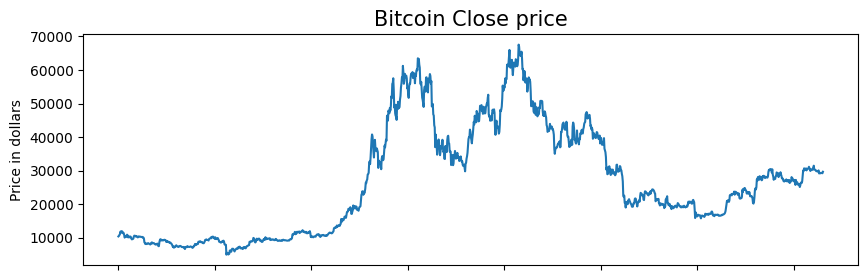

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(bitcoin_dataset['Close'])
plt.title('Bitcoin Close price', fontsize=15)
plt.ylabel('Price in dollars')
plt.gca().axes.xaxis.set_ticklabels([])
plt.show()

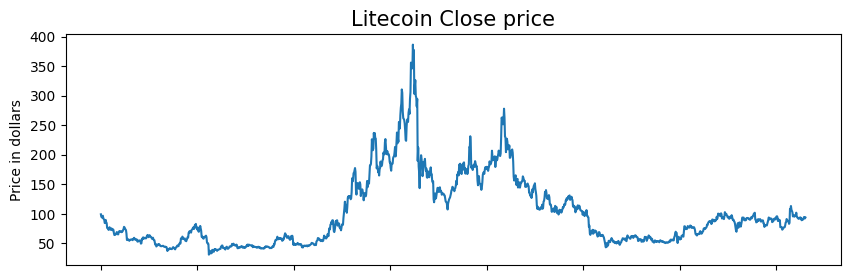

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(litecoin_dataset['Close'])
plt.title('Litecoin Close price', fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Price in dollars')
plt.show()

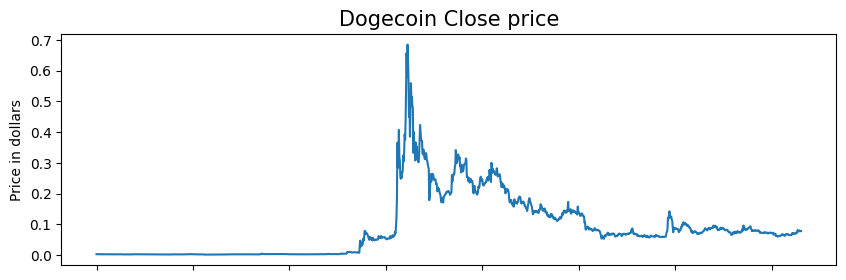

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(dogecoin_dataset['Close'])
plt.title('Dogecoin Close price', fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Price in dollars')
plt.show()

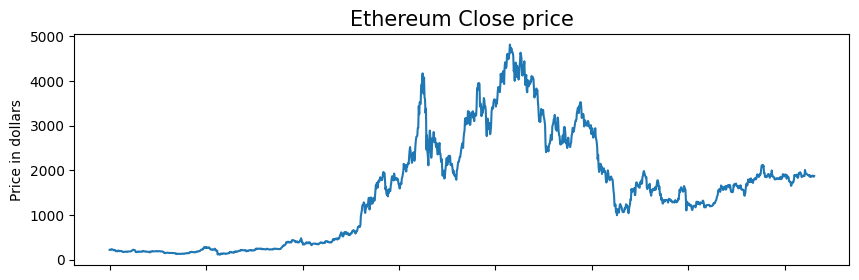

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(ethereum_dataset['Close'])
plt.title('Ethereum Close price', fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Price in dollars')
plt.show()

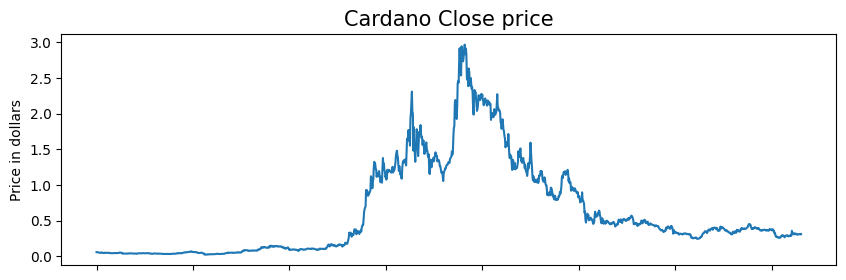

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(cardano_dataset['Close'])
plt.title('Cardano Close price', fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Price in dollars')
plt.show()

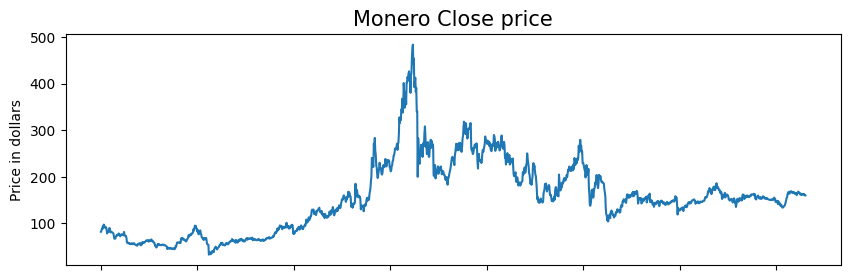

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(monero_dataset['Close'])
plt.title('Monero Close price', fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Price in dollars')
plt.show()

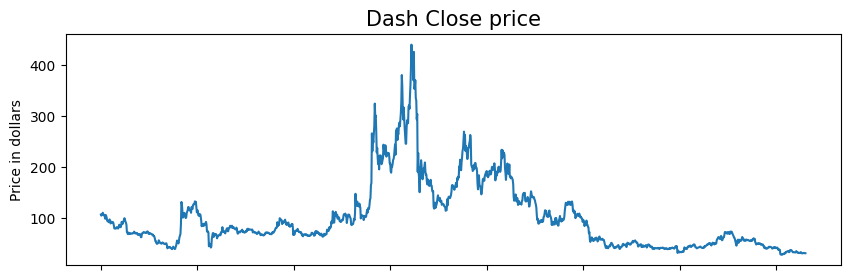

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(dash_dataset['Close'])
plt.title('Dash Close price', fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Price in dollars')
plt.show()

<h3>Дистрибуција на вредности на колони<h3>

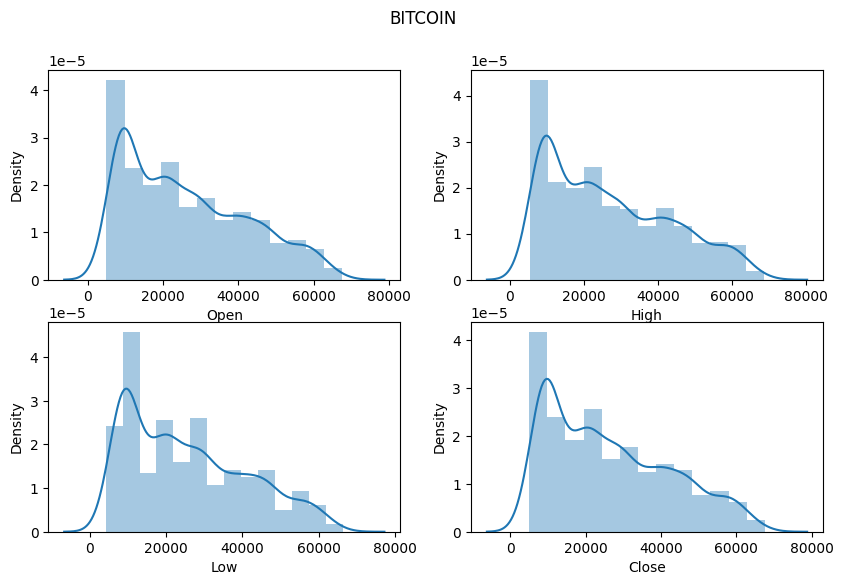

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('BITCOIN')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(bitcoin_dataset[col])
plt.show()

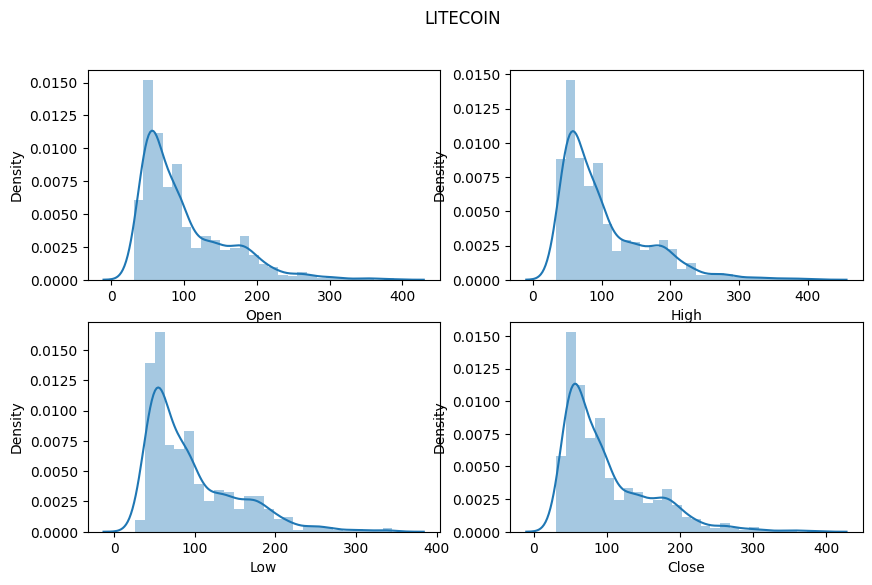

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('LITECOIN')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(litecoin_dataset[col])
plt.show()

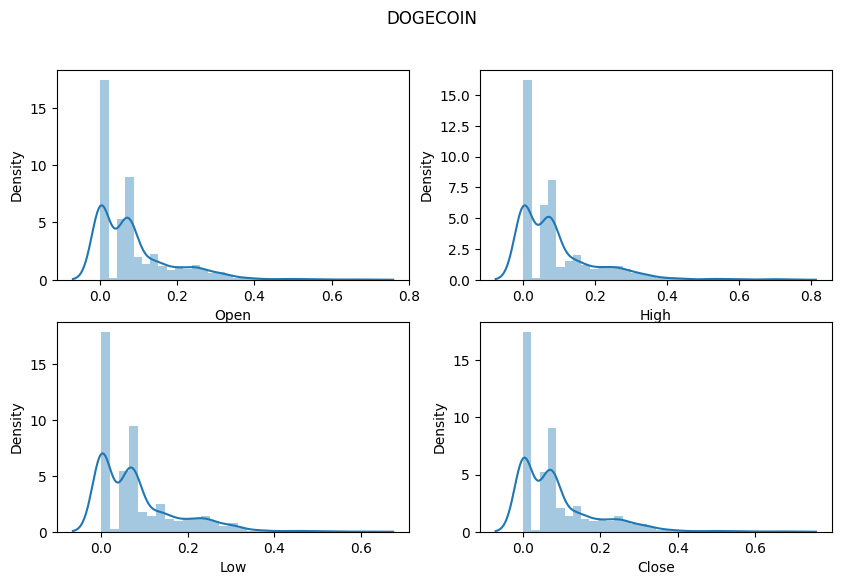

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('DOGECOIN')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(dogecoin_dataset[col])
plt.show()

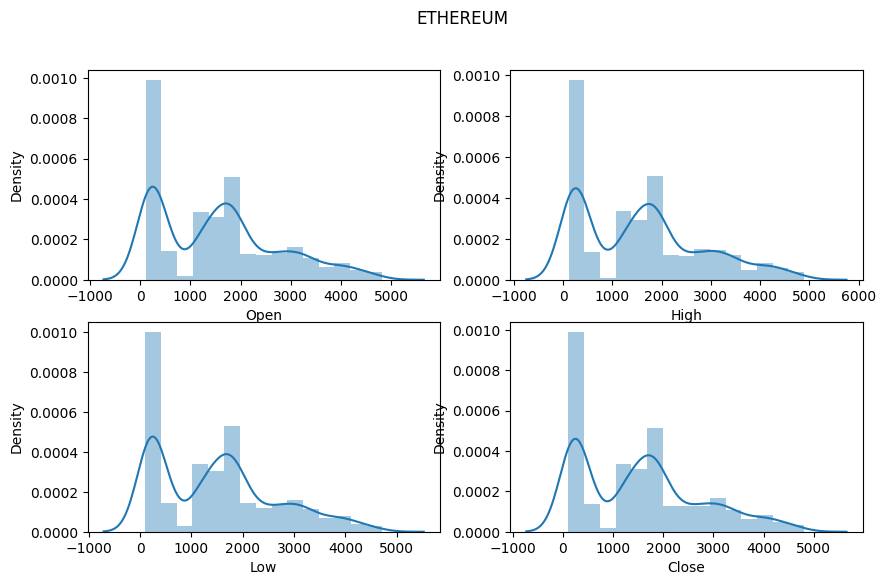

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('ETHEREUM')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(ethereum_dataset[col])
plt.show()

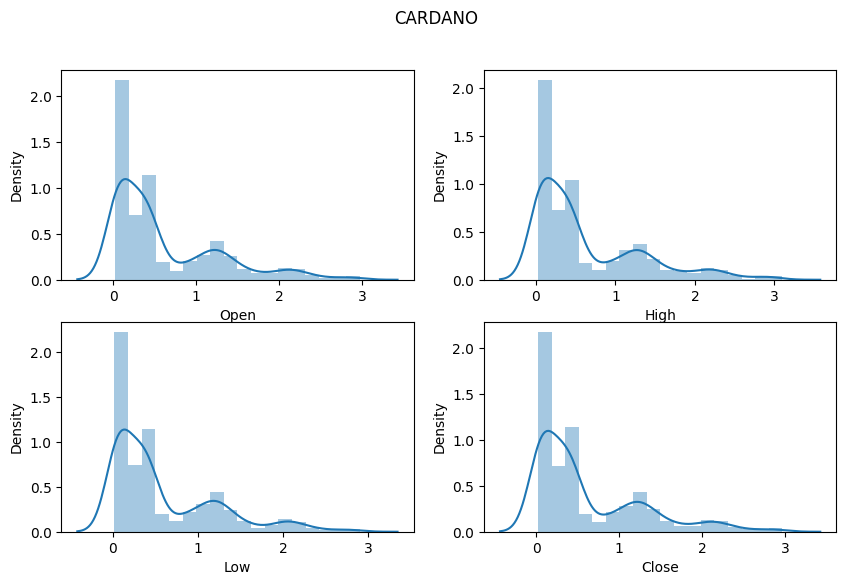

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('CARDANO')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(cardano_dataset[col])
plt.show()

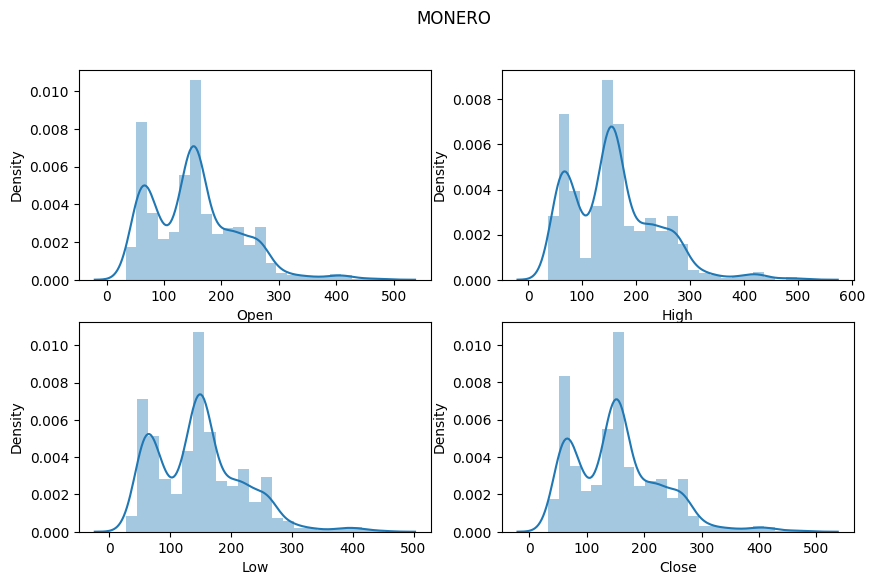

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('MONERO')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(monero_dataset[col])
plt.show()

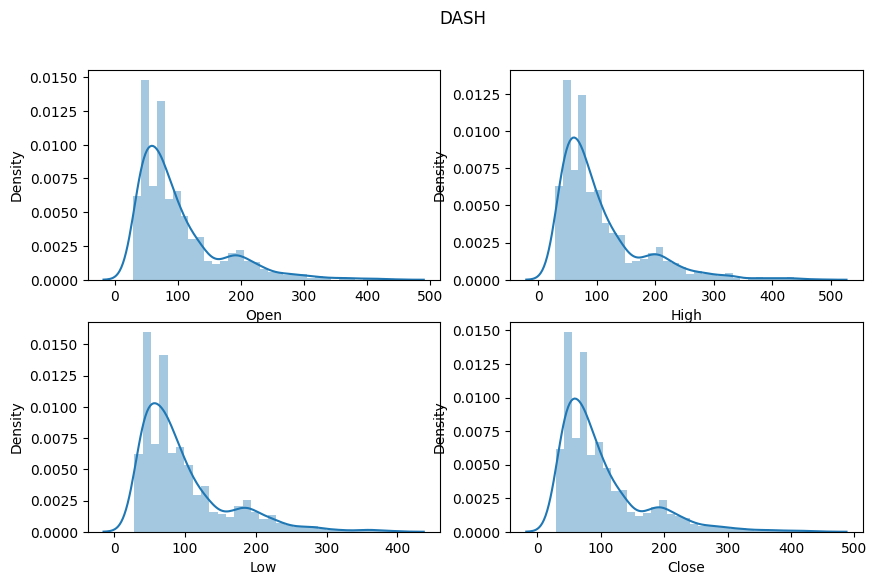

In [ ]:
plt.subplots(figsize=(10,6))
plt.suptitle('DASH')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  sb.distplot(dash_dataset[col])
plt.show()

<h3>Heatmap на податочните множества<h3>

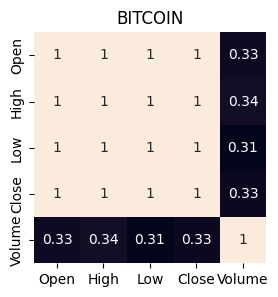

In [ ]:
plt.figure(figsize=(3, 3))
sb.heatmap(bitcoin_dataset.corr(), annot=True, cbar=False)
plt.title('BITCOIN')
plt.show()

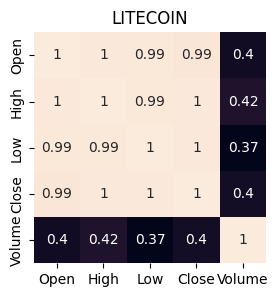

In [ ]:
plt.figure(figsize=(3, 3))
plt.title('LITECOIN')
sb.heatmap(litecoin_dataset.corr(), annot=True, cbar=False)
plt.show()

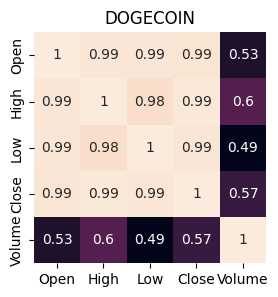

In [ ]:
plt.figure(figsize=(3, 3))
sb.heatmap(dogecoin_dataset.corr(), annot=True, cbar=False)
plt.title('DOGECOIN')
plt.show()

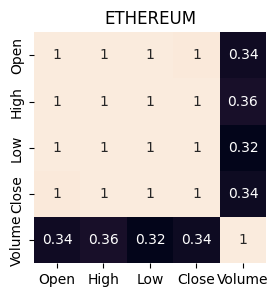

In [ ]:
plt.figure(figsize=(3, 3))
sb.heatmap(ethereum_dataset.corr(), annot=True, cbar=False)
plt.title('ETHEREUM')
plt.show()

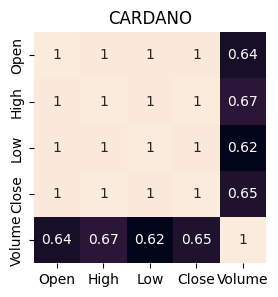

In [ ]:
plt.figure(figsize=(3, 3))
sb.heatmap(cardano_dataset.corr(), annot=True, cbar=False)
plt.title('CARDANO')
plt.show()

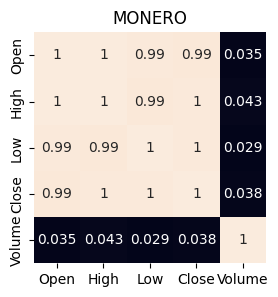

In [ ]:
plt.figure(figsize=(3, 3))
sb.heatmap(monero_dataset.corr(), annot=True, cbar=False)
plt.title('MONERO')
plt.show()

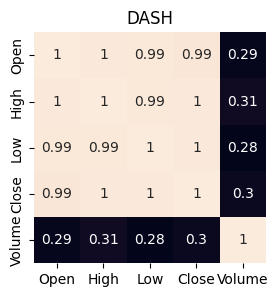

In [ ]:
plt.figure(figsize=(3, 3))
sb.heatmap(dash_dataset.corr(), annot=True, cbar=False)
plt.title('DASH')
plt.show()

Од Heatmap можеме да заклучиме дека постои висока корелација помеѓу 'Open', 'High', 'Low' и 'Close' колоните во податочните множества.

# Предвидување на вредности на криптовалути

<h3>LSTM (Long Short-Term Memory)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import r2_score
SEQ_LEN = 100
BATCH_SIZE = 64
def lstmScore(dataset):
  dataset.drop(['Open', 'Low', 'High','Volume'], axis=1)
  scaler = MinMaxScaler()
  close_price = dataset.Close.values.reshape(-1, 1)
  scaled_close = scaler.fit_transform(close_price)
  scaled_close = scaled_close[~np.isnan(scaled_close)]
  scaled_close = scaled_close.reshape(-1, 1)
  X_train, y_train, X_test, y_test =\
  preprocess(scaled_close, SEQ_LEN, train_split = 0.80)

  model = tf.keras.Sequential()
  model.add(layers.LSTM(units=32, return_sequences=True,
  input_shape=(99,1), dropout=0.2))
  model.add(layers.LSTM(units=32, return_sequences=True,
  dropout=0.2))
  model.add(layers.LSTM(units=32, dropout=0.2))
  model.add(layers.Dense(units=1))
  model.summary()
  model.compile(
      loss='mean_squared_error',
      optimizer='adam'
  )
  history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
  )
  model.evaluate(X_test, y_test)
  y_pred = model.predict(X_test)
  return float("{:.4f}".format(r2_score(y_test,y_pred)))


def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

lstm_bitcoin = lstmScore(bitcoin_dataset)
lstm_litecoin = lstmScore(litecoin_dataset)
lstm_dogecoin = lstmScore(dogecoin_dataset)
lstm_ethereum = lstmScore(ethereum_dataset)
lstm_cardano = lstmScore(cardano_dataset)
lstm_monero = lstmScore(monero_dataset)
lstm_dash = lstmScore(dash_dataset)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 99, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 99, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
16/16 [==============================] - 12s 315ms/step - loss: 0.0455 - val_loss: 0.0524
Epoch 2/5
16/16 [==============================] - 2s 145ms/step - loss: 0.0533 - va

**Резултати (R2 score) на LSTM за различните криптовалути**

In [ ]:
table = {'1' : ['Bitcoin',lstm_bitcoin],
         '2' : ['Litecoin', lstm_litecoin],
         '3' : ['Dogecoin', lstm_dogecoin],
         '4' : ['Ethereum', lstm_ethereum],
         '5' : ['Cardano', lstm_cardano],
         '6' : ['Monero', lstm_monero],
         '7' : ['Dash', lstm_dash]
         }

df = pd.DataFrame(table)
df.index = ['Crypo Currency', 'R2 Score']
df

,1,2,3,4,5,6,7
Crypo Currency,Bitcoin,Litecoin,Dogecoin,Ethereum,Cardano,Monero,Dash
R2 Score,0.6018,-1.3759,-9.0432,0.8041,-1.6719,-3.9126,0.4618


In [ ]:
table1 = {'' : ['',(lstm_bitcoin+lstm_litecoin+lstm_dogecoin+lstm_ethereum+lstm_cardano+lstm_monero+lstm_dash)/7]}
df1 = pd.DataFrame(table1)
df1.index = ['','R2 score Average']
df1

,
,
R2 score Average,-2.019414


<h3>Linear Regression

In [ ]:
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

def linearReg(dataset):
  dataset['Date'] = pd.to_numeric(pd.to_datetime(dataset['Date']))
  dataset.drop(['Open', 'Low', 'High','Volume'], axis=1)
  dataset = dataset[['Close']]

  forecast_out = int(20)

  dataset['Prediction'] = dataset[['Close']].shift(-forecast_out)

  X = np.array(dataset.drop(['Prediction'],1))
  X = preprocessing.scale(X)

  X_forecast = X[-forecast_out:]
  X = X[:-forecast_out]

  y = np.array(dataset['Prediction'])
  y = y[:-forecast_out]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

  clf = LinearRegression()
  clf.fit(X_train,y_train)

  print('R2 score:  ' + ("{:.4f}".format(clf.score(X_test,y_test))))
  return float("{:.4f}".format(clf.score(X_test,y_test)))

In [ ]:
print('==============Bitcoin===============')
bitcoin_linear = linearReg(bitcoin_dataset)
print('==============Litecoin==============')
litecoin_linear = linearReg(litecoin_dataset)
print('==============Dogecoin==============')
dogecoin_linear = linearReg(dogecoin_dataset)
print('==============Ethereum==============')
ethereum_linear = linearReg(ethereum_dataset)
print('==============Cardano===============')
cardano_linear = linearReg(cardano_dataset)
print('==============Monero================')
monero_linear = linearReg(monero_dataset)
print('==============Dash==================')
dash_linear = linearReg(dash_dataset)

==============Bitcoin===============
R2 score:  0.9024
==============Litecoin==============
R2 score:  0.7800
==============Dogecoin==============
R2 score:  0.7645
==============Ethereum==============
R2 score:  0.8929
==============Cardano===============
R2 score:  0.9160
==============Monero================
R2 score:  0.7607
==============Dash==================
R2 score:  0.7441


In [ ]:
table = {'1' : ['Bitcoin',bitcoin_linear],
         '2' : ['Litecoin', litecoin_linear],
         '3' : ['Dogecoin', dogecoin_linear],
         '4' : ['Ethereum', ethereum_linear],
         '5' : ['Cardano', cardano_linear],
         '6' : ['Monero', monero_linear],
         '7' : ['Dash', dash_linear]
         }

df = pd.DataFrame(table)
df.index = ['Crypo Currency', 'R2 Score']
df

,1,2,3,4,5,6,7
Crypo Currency,Bitcoin,Litecoin,Dogecoin,Ethereum,Cardano,Monero,Dash
R2 Score,0.9024,0.78,0.7645,0.8929,0.916,0.7607,0.7441


In [ ]:
table1 = {'' : ['',(bitcoin_linear + litecoin_linear + dogecoin_linear + ethereum_linear + cardano_linear + monero_linear + dash_linear)/7]}
df1 = pd.DataFrame(table1)
df1.index = ['','R2 score Average']
df1

,
,
R2 score Average,0.822943


<h3>Random Forest Regression

In [ ]:
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def randomForest(dataset):
  dataset['Date'] = pd.to_numeric(pd.to_datetime(dataset['Date']))
  dataset.drop(['Open', 'Low', 'High','Volume'], axis=1)
  df=dataset
  forecast_out = int(20)

  df['Prediction'] = df[['Close']].shift(-forecast_out)

  X = np.array(df.drop(['Prediction'],1))
  X = preprocessing.scale(X)

  X_forecast = X[-forecast_out:]
  X = X[:-forecast_out]

  y = np.array(df['Prediction'])
  y = y[:-forecast_out]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

  forest_reg = RandomForestRegressor(random_state=42)
  forest_reg.fit(X_train, y_train)

  print('R2 score:   %.4f' % forest_reg.score(X_test, y_test))

  return float("{:.4f}".format(forest_reg.score(X_test, y_test)))


In [ ]:
print('==============Bitcoin===============')
bitcoin_random_forest = randomForest(bitcoin_dataset)
print('==============Litecoin==============')
litecoin_random_forest = randomForest(litecoin_dataset)
print('==============Dogecoin==============')
dogecoin_random_forest = randomForest(dogecoin_dataset)
print('==============Ethereum==============')
ethereum_random_forest = randomForest(ethereum_dataset)
print('==============Cardano===============')
cardano_random_forest = randomForest(cardano_dataset)
print('==============Monero================')
monero_random_forest = randomForest(monero_dataset)
print('==============Dash==================')
dash_random_forest = randomForest(dash_dataset)

==============Bitcoin===============
R2 score:   0.9891
==============Litecoin==============
R2 score:   0.9727
==============Dogecoin==============
R2 score:   0.9909
==============Ethereum==============
R2 score:   0.9946
==============Cardano===============
R2 score:   0.9909
==============Monero================
R2 score:   0.9852
==============Dash==================
R2 score:   0.9815


**Резултати (R2 score) на Random Forest Regression за различните криптовалути**

In [ ]:
table = {'1' : ['Bitcoin',bitcoin_random_forest],
         '2' : ['Litecoin', litecoin_random_forest],
         '3' : ['Dogecoin', dogecoin_random_forest],
         '4' : ['Ethereum', ethereum_random_forest],
         '5' : ['Cardano', cardano_random_forest],
         '6' : ['Monero', monero_random_forest],
         '7' : ['Dash', dash_random_forest]
         }

df = pd.DataFrame(table)
df.index = ['Crypo Currency', 'R2 Score']
df

,1,2,3,4,5,6,7
Crypo Currency,Bitcoin,Litecoin,Dogecoin,Ethereum,Cardano,Monero,Dash
R2 Score,0.9891,0.9727,0.9909,0.9946,0.9909,0.9852,0.9815


In [ ]:
table1 = {'' : ['',(bitcoin_random_forest+litecoin_random_forest+dogecoin_random_forest+ethereum_random_forest+cardano_random_forest+monero_random_forest+dash_random_forest)/7]}
df1 = pd.DataFrame(table1)
df1.index = ['','R2 score Average']
df1

,
,
R2 score Average,0.986414


# Заклучок

**Прецизност на модели според криптовалути**

In [ ]:
bitcoin_table = pd.DataFrame({'LSTM' : [lstm_bitcoin],
                'Linear Regression' : [bitcoin_linear],
                'Random Forest' : [bitcoin_random_forest]
                })
litecoin_table = pd.DataFrame({'LSTM' : [lstm_litecoin],
                'Linear Regression' : [litecoin_linear],
                'Random Forest' : [litecoin_random_forest]
                })
dogecoin_table = pd.DataFrame({'LSTM' : [lstm_dogecoin],
                'Linear Regression' : [dogecoin_linear],
                'Random Forest' : [dogecoin_random_forest]
                })
ethereum_table = pd.DataFrame({'LSTM' : [lstm_ethereum],
                'Linear Regression' : [ethereum_linear],
                'Random Forest' : [ethereum_random_forest]
                })
cardano_table = pd.DataFrame({'LSTM' : [lstm_cardano],
                'Linear Regression' : [cardano_linear],
                'Random Forest' : [cardano_random_forest]
                })
monero_table =  pd.DataFrame({'LSTM' : [lstm_monero],
                'Linear Regression' : [monero_linear],
                'Random Forest' : [monero_random_forest]
                })
dash_table =    pd.DataFrame({'LSTM' : [lstm_dash],
                'Linear Regression' : [dash_linear],
                'Random Forest' : [dash_random_forest]
                })

In [ ]:
print('==================BITCOIN===================')
print(bitcoin_table.to_string(index=False) + '\n')
print('==================LITECOIN==================')
print(litecoin_table.to_string(index=False) + '\n')
print('==================DOGECOIN==================')
print(dogecoin_table.to_string(index=False) + '\n')
print('==================ETHEREUM==================')
print(ethereum_table.to_string(index=False) + '\n')
print('==================CARDANO===================')
print(cardano_table.to_string(index=False) + '\n')
print('==================MONERO====================')
print(monero_table.to_string(index=False) + '\n')
print('==================DASH======================')
print(dash_table.to_string(index=False))

==================BITCOIN===================
  LSTM  Linear Regression  Random Forest
0.6018             0.9024         0.9891

==================LITECOIN==================
   LSTM  Linear Regression  Random Forest
-1.3759               0.78         0.9727

==================DOGECOIN==================
   LSTM  Linear Regression  Random Forest
-9.0432             0.7645         0.9909

==================ETHEREUM==================
  LSTM  Linear Regression  Random Forest
0.8041             0.8929         0.9946

==================CARDANO===================
   LSTM  Linear Regression  Random Forest
-1.6719              0.916         0.9909

==================MONERO====================
   LSTM  Linear Regression  Random Forest
-3.9126             0.7607         0.9852

==================DASH======================
  LSTM  Linear Regression  Random Forest
0.4618             0.7441         0.9815


**Табеларен приказ на добиените резултати од сите модели и сите криптовалути.**

In [ ]:
table = {'Bitcoin' : [lstm_bitcoin, bitcoin_linear , bitcoin_random_forest],
         'Litecoin' : [lstm_litecoin, litecoin_linear , litecoin_random_forest],
         'Dogecoin' : [lstm_dogecoin, dogecoin_linear , dogecoin_random_forest],
         'Ethereum' : [lstm_ethereum, ethereum_linear , ethereum_random_forest],
         'Cardano' : [lstm_cardano, cardano_linear , cardano_random_forest],
         'Monero' : [lstm_monero, monero_linear , monero_random_forest],
         'Dash' : [lstm_dash, dash_linear , dash_random_forest],
         '            AVERAGE           ' : [
          (lstm_bitcoin + lstm_litecoin + lstm_dogecoin + lstm_ethereum + lstm_cardano + lstm_monero + lstm_dash)/7,
          (bitcoin_linear + litecoin_linear + dogecoin_linear + ethereum_linear + cardano_linear + monero_linear + dash_linear)/7 ,
          (bitcoin_random_forest + litecoin_random_forest + dogecoin_random_forest + ethereum_random_forest + cardano_random_forest + monero_random_forest + dash_random_forest)/7]
         }

df = pd.DataFrame(table)
df.index = ['LSTM', 'Linear Regression', 'Random Forest Regression']


df

,Bitcoin,Litecoin,Dogecoin,Ethereum,Cardano,Monero,Dash,AVERAGE
LSTM,0.6018,-1.3759,-9.0432,0.8041,-1.6719,-3.9126,0.4618,-2.019414
Linear Regression,0.9024,0.7800,0.7645,0.8929,0.9160,0.7607,0.7441,0.822943
Random Forest Regression,0.9891,0.9727,0.9909,0.9946,0.9909,0.9852,0.9815,0.986414


**Јасно е дека LSTM моделот има многу нестабилни перформанси со тоа што за некои од податочните множества иако се добива поприфатливи перформанси за другиот дел на криптовалути перформансите на LSTM се неприфатливи.**

**Со користење на Линеарна регресија се добива прилично добри перформанси со просек од R2=0.82**

**Од друга страна можеме да заклучиме дека со овие податочни множества најдобри перформанси и прецизност на предикција имаме со користење на моделот Random Forest Regression со коефициент на определување приближно до 1.**